# Comparison of 1D finite difference scalar wave equation absorbing boundary conditions
*by [Alan Richardson](mailto:alan@ausargeo.com) ([Ausar Geophysical](http://www.ausargeo.com))*

In [a previous notebook](https://github.com/ar4/wave_1d_fd_pml/blob/master/notebooks/wave_1d_fd_pml.ipynb) I explored PML (Perfectly Matched Layers) to create non-reflective boundaries in a 1D wave propagator. Another proposed method for achieving this is called Hybrid ABC (absorbing boundary condition). This involves padding the domain where the wavefield is to be computed with a region several cells deep. In this padding region, the wavefield is computed using a linear combination of both the regular two-way wave equation, and also the one-way wave equation. The weighting applied to these two component linearly shifts from being only the two-way solution at the inner boundary, to only being the one-way solution at the outer boundary.

In this notebook I compare PML absorption with that of the Hybrid ABC method. There are various ways of implementing the one-way wave propagation that is required for the Hybrid ABC method, so I try four of these.

In [1]:
from wave_1d_fd_abc.propagators import (Oneway, Pml2)
from wave_1d_fd_pml import test_wave_1d_fd_pml
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Results

To compare the methods, I will use a simple 1D layer over a halfspace model that consists of a region where the wave speed is 1500 m/s above a region where the wave speed is 2500 m/s. A single Ricker wavelet source is in the first of these regions.

In [2]:
model = test_wave_1d_fd_pml.model_one(nsteps=1000)

### PML

I use the optimal PML coefficients that I found in my PML notebook.

The plot below shows the 1D wavefield over 1000 time steps. The x axis is space and the y axis is time. It is clear that the PML method works very well, as the waves disappear shortly after entering the PML regions (the left and right boundaries of the image) and there are no visible reflections from these boundaries.

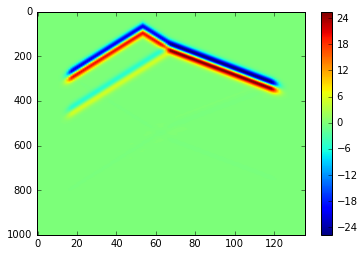

In [3]:
v1 = Pml2(model['model'], model['dx'], model['dt'])
y1 = v1.steps(model['nsteps'], model['sources'], model['sx'])
plt.imshow(y1, aspect='auto'); plt.colorbar()

### Hybrid ABC

In the four exampes below, I run the Hybrid ABC method with either Upwind, Lax-Friedrichs, Leapfrog,  or Lax-Wendroff as the one-way propagator. The depth of the absorbing region is 10 cells in all cases.

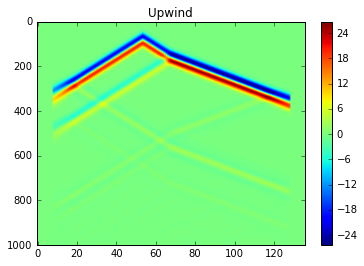

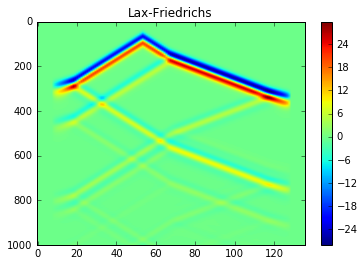

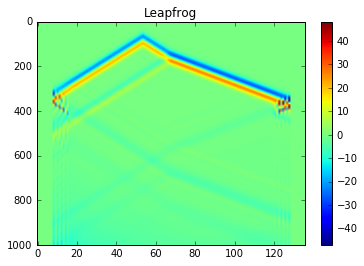

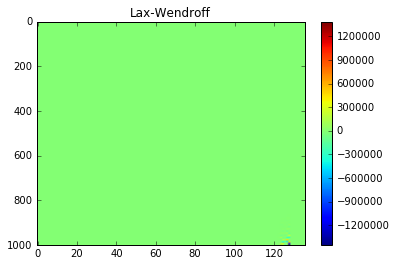

In [4]:
methods=['Upwind', 'Lax-Friedrichs', 'Leapfrog', 'Lax-Wendroff']
for method in range(1, 5):
    v2 = Oneway(model['model'], model['dx'], model['dt'], abc_width=10, method=method)
    y2 = v2.steps(model['nsteps'], model['sources'], model['sx'])
    plt.figure()
    plt.imshow(y2, aspect='auto'); plt.colorbar()
    plt.title(methods[method-1])

The method is certainly not as effective as the PML method in this test. It is likely that a higher order one-way propagator is necessary for it to be successful, but these are not trivial to implement.

Note that the Lax-Wendroff result appears to be blank because it explodes, so the colour range is dominated by the high amplitudes in the final time step.